In [56]:
import pandas as pd
import pickle as p

import matplotlib.pyplot as plt
from pathlib import Path 
current_path = Path().resolve()

RAW_PATH = current_path.parent / 'data' / 'raw'
OUTPUT_PATH = current_path.parent / 'data' / 'output'
IMGS_PATH = current_path.parent / 'imgs'

%matplotlib inline

In [40]:
df = pd.read_csv(RAW_PATH / 'montevideo' / 'waze_features.csv').set_index('h3id_9')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1951 entries, 89c2f156b4fffff to 89c2f11939bffff
Data columns (total 21 columns):
max_counta              1951 non-null int64
avg_congested_prop      1951 non-null float64
max_length              1951 non-null int64
max_avg_speed           1951 non-null float64
min_avg_speed           1951 non-null float64
avg_speed               1951 non-null float64
max_median_level        1951 non-null int64
min_median_level        1951 non-null int64
median_level            1951 non-null int64
h3id_9.1                1951 non-null object
bool_highway            1951 non-null int64
bool_primary            1951 non-null int64
bool_ramps              1951 non-null int64
bool_secondary          1951 non-null int64
count_highway           1951 non-null int64
count_streets           1951 non-null int64
count_primary           1951 non-null int64
count_secondary         1951 non-null int64
count_primary_street    1951 non-null int64
count_primary_ramps     1951

In [42]:
new_columns = ['avg_congested_prop',
 'max_length',
 'avg_speed',
 'min_median_level',
 'bool_highway',
 'bool_ramps',
 'count_highway',
 'count_streets',
 'count_primary',
 'count_secondary',
 'count_primary_street',
 'count_primary_ramps']

In [43]:
df = df[new_columns]

In [45]:
from sklearn.preprocessing import MinMaxScaler
# Reescaling
scaler = MinMaxScaler(feature_range=(0, 1))
df = pd.DataFrame(scaler.fit_transform(df.values), index=df.index, columns=new_columns)

In [46]:
models = p.load(open(OUTPUT_PATH / 'final_models/all_models.p', 'rb'))

In [47]:

final = pd.DataFrame()
for i in range(3):
    clf = models[i][1]['optimized_xgboost']['best_estimator']
    final = pd.concat([ final,
        pd.DataFrame(clf.predict(df), index=df.index).rename(columns={0: models[i][1]['pollutant']})],
                      1)

In [48]:
final.to_csv(OUTPUT_PATH / 'final_models' / 'montevideo_xgboost.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1170aab00>,
      dtype=object)

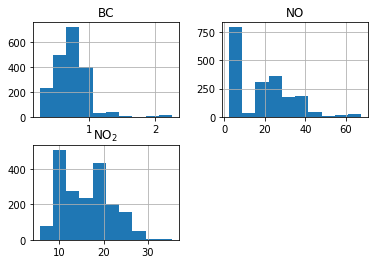

In [52]:

final.hist()

In [61]:
f = final.sort_values(by='NO', ascending=False).reset_index()['NO']

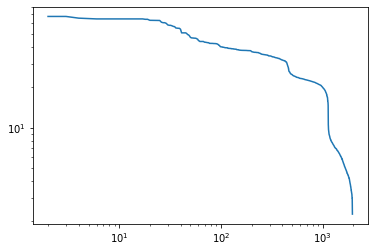

In [62]:
plt.loglog(f.index + 2, f)